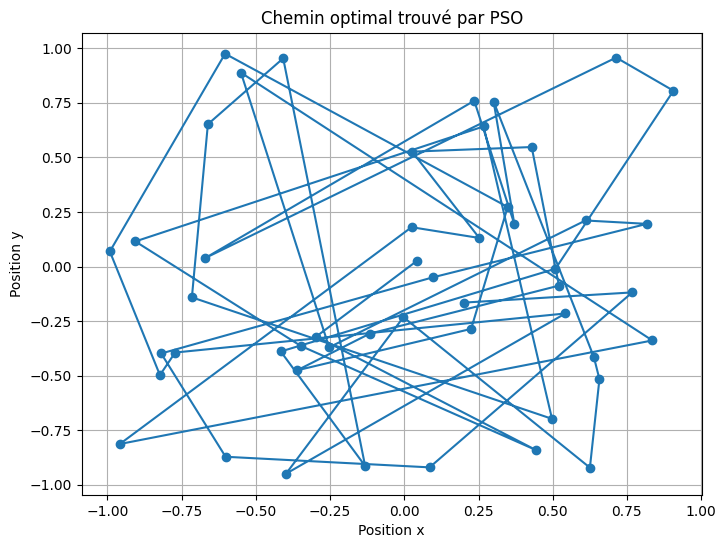

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PSO:
    def __init__(self, N, distance_matrix, num_particles=30, max_iter=100):
        self.N = N
        self.distance_matrix = distance_matrix
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.particles = np.random.permutation(N)[:, np.newaxis] * np.ones((N, num_particles), dtype=int)
        self.velocities = np.zeros((N, num_particles), dtype=int)
        self.pbest = self.particles.copy()
        self.gbest = self.particles[:, 0]
        self.fitness_pbest = np.zeros(num_particles)
        self.fitness_gbest = 0

    def evaluate_fitness(self, particle):
        return np.sum(self.distance_matrix[particle[:-1], particle[1:]]) + self.distance_matrix[particle[-1], particle[0]]

    def update(self):
        for i in range(self.num_particles):
            fitness = self.evaluate_fitness(self.particles[:, i])
            if fitness < self.fitness_pbest[i]:
                self.pbest[:, i] = self.particles[:, i].copy()
                self.fitness_pbest[i] = fitness
                if fitness < self.fitness_gbest:
                    self.gbest = self.particles[:, i].copy()
                    self.fitness_gbest = fitness
            r1, r2 = np.random.rand(), np.random.rand()
            self.velocities[:, i] = 0.5 * self.velocities[:, i] + 2 * r1 * (self.pbest[:, i] - self.particles[:, i]) \
                + 2 * r2 * (self.gbest - self.particles[:, i])
            self.particles[:, i] += self.velocities[:, i]
            self.particles[:, i] %= self.N

    def optimize(self):
        for _ in range(self.max_iter):
            self.update()
        return self.gbest

def run_pso(N, distance_matrix, num_particles=30, max_iter=100, num_trials=10):
    best_fitness = float('inf')
    best_path = None
    for _ in range(num_trials):
        pso = PSO(N, distance_matrix, num_particles, max_iter)
        current_best_path = pso.optimize()
        current_fitness = pso.evaluate_fitness(current_best_path)
        if current_fitness < best_fitness:
            best_fitness = current_fitness
            best_path = current_best_path
    return best_path

# Données du problème
N = 50
np.random.seed(10)
xpos = 2 * np.random.rand(N) - 1
ypos = 2 * np.random.rand(N) - 1
dx2 = ((xpos[:, np.newaxis] - xpos) ** 2)
dy2 = ((ypos[:, np.newaxis] - ypos) ** 2)
distance_matrix = np.sqrt(dx2 + dy2)

# PSO
pso = PSO(N, distance_matrix)
best_path = run_pso(N, distance_matrix)

# Affichage du résultat
plt.figure(figsize=(8, 6))
plt.plot(xpos[best_path], ypos[best_path], marker='o', linestyle='-')
plt.title('Chemin optimal trouvé par PSO')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.grid(True)
plt.show()

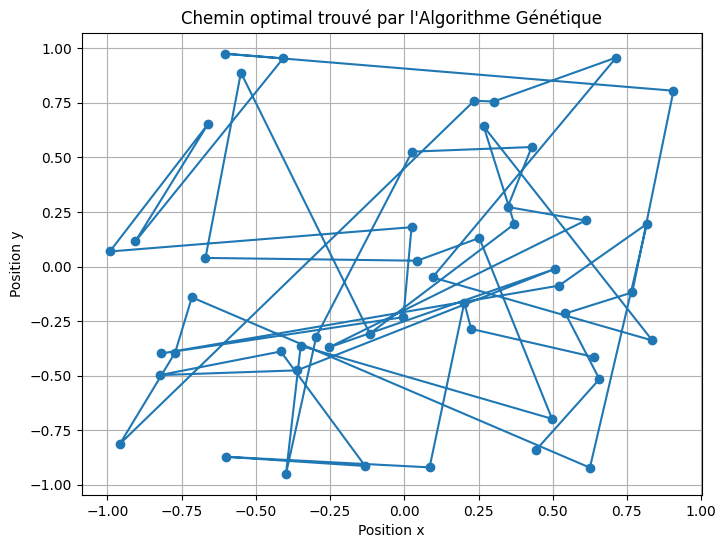

In [ ]:
class GeneticAlgorithm:
    def __init__(self, N, distance_matrix, population_size=100, crossover_rate=0.8, mutation_rate=0.02, generations=1000):
        self.N = N
        self.distance_matrix = distance_matrix
        self.population_size = population_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.generations = generations

    def initialize_population(self):
        return np.array([np.random.permutation(self.N) for _ in range(self.population_size)])

    def evaluate_fitness(self, population):
        return np.array([np.sum(self.distance_matrix[path[:-1], path[1:]]) + self.distance_matrix[path[-1], path[0]] for path in population])

    def selection(self, population, fitness):
        probabilities = 1 / (fitness + 1e-10)
        probabilities /= probabilities.sum()
        return population[np.random.choice(np.arange(len(population)), size=len(population), p=probabilities)]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            start, end = sorted(np.random.randint(0, self.N, 2))
            child = [-1] * self.N
            child[start:end] = parent1[start:end]
            remaining = [city for city in parent2 if city not in child]
            index = 0
            for i in range(self.N):
                if child[i] == -1:
                    child[i] = remaining[index]
                    index += 1
            return np.array(child)
        else:
            return parent1.copy()

    def mutate(self, path):
        if np.random.rand() < self.mutation_rate:
            idx1, idx2 = np.random.choice(np.arange(self.N), size=2, replace=False)
            path[idx1], path[idx2] = path[idx2], path[idx1]
        return path

    def evolve(self):
        population = self.initialize_population()
        best_distance = float('inf')
        best_path = None
        for generation in range(self.generations):
            fitness = self.evaluate_fitness(population)
            fittest_idx = np.argmin(fitness)
            if fitness[fittest_idx] < best_distance:
                best_distance = fitness[fittest_idx]
                best_path = population[fittest_idx]
            selected = self.selection(population, fitness)
            offspring = []
            for i in range(0, len(selected), 2):
                parent1, parent2 = selected[i], selected[i + 1]
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                offspring.extend([self.mutate(child1), self.mutate(child2)])
            population = np.array(offspring)
        return best_path, best_distance

# Données du problème
N = 50
np.random.seed(10)
xpos = 2 * np.random.rand(N) - 1
ypos = 2 * np.random.rand(N) - 1
dx2 = ((xpos[:, np.newaxis] - xpos) ** 2)
dy2 = ((ypos[:, np.newaxis] - ypos) ** 2)
distance_matrix = np.sqrt(dx2 + dy2)

# Algorithme génétique
ga = GeneticAlgorithm(N, distance_matrix)
best_path, best_distance = ga.evolve()

# Affichage du résultat
plt.figure(figsize=(8, 6))
plt.plot(xpos[best_path], ypos[best_path], marker='o', linestyle='-')
plt.title('Chemin optimal trouvé par l\'Algorithme Génétique')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.grid(True)
plt.show()

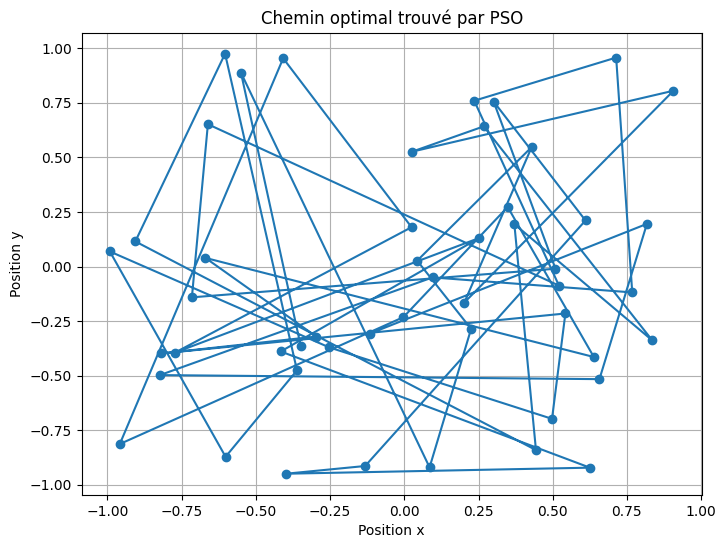

In [ ]:
class PSO:
    def __init__(self, N, distance_matrix, num_particles=30, max_iter=100):
        self.N = N
        self.distance_matrix = distance_matrix
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.particles = np.random.permutation(N)[:, np.newaxis] * np.ones((N, num_particles), dtype=int)
        self.velocities = np.zeros((N, num_particles), dtype=int)
        self.pbest = self.particles.copy()
        self.gbest = self.particles[:, 0]
        self.fitness_pbest = np.zeros(num_particles)
        self.fitness_gbest = 0

    def evaluate_fitness(self, particle):
        return np.sum(self.distance_matrix[particle[:-1], particle[1:]]) + self.distance_matrix[particle[-1], particle[0]]

    def update(self):
        for i in range(self.num_particles):
            fitness = self.evaluate_fitness(self.particles[:, i])
            if fitness < self.fitness_pbest[i]:
                self.pbest[:, i] = self.particles[:, i].copy()
                self.fitness_pbest[i] = fitness
                if fitness < self.fitness_gbest:
                    self.gbest = self.particles[:, i].copy()
                    self.fitness_gbest = fitness
            r1, r2 = np.random.rand(), np.random.rand()
            self.velocities[:, i] = 0.5 * self.velocities[:, i] + 2 * r1 * (self.pbest[:, i] - self.particles[:, i]) \
                + 2 * r2 * (self.gbest - self.particles[:, i])
            self.particles[:, i] += self.velocities[:, i]
            self.particles[:, i] %= self.N

    def optimize(self):
        for _ in range(self.max_iter):
            self.update()
        return self.gbest

# Données du problème
N = 50
np.random.seed(10)
xpos = 2 * np.random.rand(N) - 1
ypos = 2 * np.random.rand(N) - 1
dx2 = ((xpos[:, np.newaxis] - xpos) ** 2)
dy2 = ((ypos[:, np.newaxis] - ypos) ** 2)
distance_matrix = np.sqrt(dx2 + dy2)

# PSO
pso = PSO(N, distance_matrix)
best_path = pso.optimize()

# Affichage du résultat
plt.figure(figsize=(8, 6))
plt.plot(xpos[best_path], ypos[best_path], marker='o', linestyle='-')
plt.title('Chemin optimal trouvé par PSO')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.grid(True)
plt.show()

Meilleurs paramètres trouvés: (0.5, 1.8, 0.8)
Meilleure fitness: 39.40645446559504


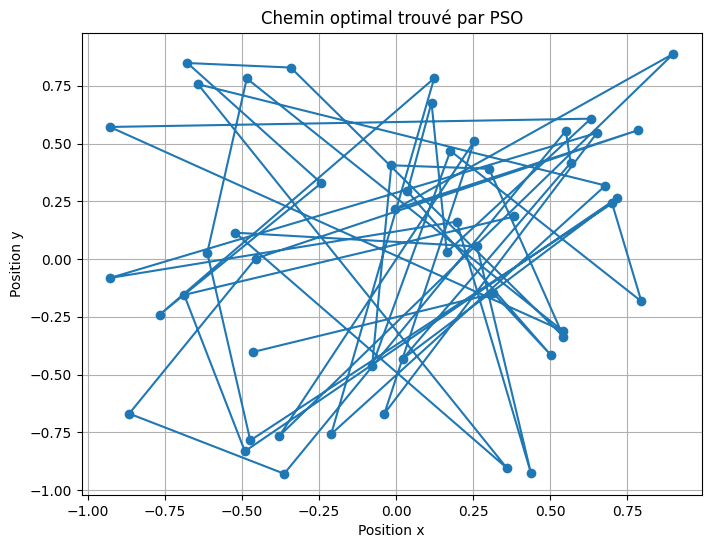

Distance parcourue: 53.132634696095614


In [ ]:
class PSO:
    def __init__(self, N, distance_matrix, num_particles=30, max_iter=100, omega=0.1, c1=0.2, c2=0.2):
        self.N = N
        self.distance_matrix = distance_matrix
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.omega = omega
        self.c1 = c1
        self.c2 = c2
        self.particles = np.random.permutation(N)[:, np.newaxis] * np.ones((N, num_particles), dtype=int)
        self.velocities = np.zeros((N, num_particles), dtype=int)
        self.pbest = self.particles.copy()
        self.gbest = self.particles[:, 0]
        self.fitness_pbest = np.zeros(num_particles)
        self.fitness_gbest = 0

    def evaluate_fitness(self, particle):
        return np.sum(self.distance_matrix[particle[:-1], particle[1:]]) + self.distance_matrix[particle[-1], particle[0]]

    def update(self):
        for i in range(self.num_particles):
            fitness = self.evaluate_fitness(self.particles[:, i])
            if fitness < self.fitness_pbest[i]:
                self.pbest[:, i] = self.particles[:, i].copy()
                self.fitness_pbest[i] = fitness
                if fitness < self.fitness_gbest:
                    self.gbest = self.particles[:, i].copy()
                    self.fitness_gbest = fitness
            r1, r2 = np.random.rand(), np.random.rand()
            self.velocities[:, i] = self.omega * self.velocities[:, i] + \
                                     self.c1 * r1 * (self.pbest[:, i] - self.particles[:, i]) + \
                                     self.c2 * r2 * (self.gbest - self.particles[:, i])
            self.particles[:, i] += self.velocities[:, i]
            self.particles[:, i] %= self.N

    def optimize(self):
        for _ in range(self.max_iter):
            self.update()
        return self.gbest

def grid_search_pso(N, distance_matrix):
    omega_values = np.arange(0.1, 1.1, 0.1)
    c1_values = np.arange(0.2, 2.2, 0.2)
    c2_values = np.arange(0.2, 2.2, 0.2)
    best_fitness = float('inf')
    best_parameters = None
    for omega in omega_values:
        for c1 in c1_values:
            for c2 in c2_values:
                pso = PSO(N, distance_matrix, omega=omega, c1=c1, c2=c2)
                best_path = pso.optimize()
                fitness = pso.evaluate_fitness(best_path)
                if fitness < best_fitness:
                    best_fitness = fitness
                    best_parameters = (omega, c1, c2)
    return best_parameters, best_fitness

# Fonction pour visualiser le chemin optimal trouvé
def plot_optimal_path(xpos, ypos, path):
    plt.figure(figsize=(8, 6))
    plt.plot(xpos[path], ypos[path], marker='o', linestyle='-')
    plt.title('Chemin optimal trouvé par PSO')
    plt.xlabel('Position x')
    plt.ylabel('Position y')
    plt.grid(True)
    plt.show()

# Données du problème
N = 50
np.random.seed(20)
xpos = 2 * np.random.rand(N) - 1
ypos = 2 * np.random.rand(N) - 1
dx2 = ((xpos[:, np.newaxis] - xpos) ** 2)
dy2 = ((ypos[:, np.newaxis] - ypos) ** 2)
distance_matrix = np.sqrt(dx2 + dy2)

# Recherche par grille des meilleurs paramètres
best_parameters, best_fitness = grid_search_pso(N, distance_matrix)
print("Meilleurs paramètres trouvés:", best_parameters)
print("Meilleure fitness:", best_fitness)

# Exécution de l'algorithme PSO avec les meilleurs paramètres
omega, c1, c2 = best_parameters
pso = PSO(N, distance_matrix, omega=omega, c1=c1, c2=c2)
best_path = pso.optimize()
fitness = pso.evaluate_fitness(best_path)

# Affichage du chemin optimal et de la distance parcourue
plot_optimal_path(xpos, ypos, best_path)
print("Distance parcourue:", fitness)